In [2]:
import pandas as pd
import geopandas as gpd

zillow_df = gpd.read_file('../dataset/raw/3. zillow_tokenized.geojson')
zillow_df

,zpid,city,submarket,zipcode,address,price,like,view,duration,day,single,parking,bathroom,bedroom,age,living,description,geometry
0,4171164,CH,South,60617,10905 S Avenue H,309000,0,20,134,64,0,2.5,4.0,4.0,81.0,2376.0,tastefully and professionally updated 4 bedroo...,POINT (-87.53252 41.69706)
1,80851025,CH,South,60616,475 W 24th St APT 5H,265000,0,44,50,7,1,1.0,2.0,2.0,19.0,900.0,experience city living a it finest in this top...,POINT (-87.63969 41.84879)
2,2127908883,CH,West,60612,2827 W Congress Pkwy APT 3,230000,0,7,90,83,1,1.0,2.0,2.0,17.0,1300.0,offering exceptional comfort convenience and e...,POINT (-87.69721 41.87457)
3,60265291,CH,North,60614,2712 N Ashland Ave #4A,460271,0,20,25,64,1,1.0,2.0,2.0,24.0,1700.0,looking for an updated extra wide 2 bedroom 2 ...,POINT (-87.66872 41.93097)
4,3700052,CH,North,60640,5415 N Sheridan Rd APT 306,319000,2,112,37,40,1,1.0,2.0,2.0,51.0,1250.0,discover the allure of this 2 bedroom 2 bathro...,POINT (-87.65439 41.97993)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,20383564,LA,West LA,90045,8117 Chase Ave,1811700,4,186,41,7,0,4.0,3.0,4.0,78.0,1892.0,welcome to this impressive westchester home vi...,POINT (-118.41125 33.96461)
10107,20510134,LA,West LA,90067,10128 Empyrean Way APT 302,2100000,0,17,178,79,1,2.0,4.0,2.0,45.0,2498.0,from the foyer enter to a sophisticated living...,POINT (-118.40809 34.05322)
10108,19905411,LA,San Fernando Valley,91335,7428 Vanalden Ave,815000,0,59,5,47,0,2.0,1.0,3.0,72.0,1670.0,major equity opportunity in the city of reseda...,POINT (-118.54884 34.20552)
10109,302794497,LA,West LA,90094,12678 Millennium,3715000,1,140,78,12,0,3.0,5.0,4.0,7.0,3639.0,embrace luxury living and the best in playa vi...,POINT (-118.41388 33.97678)


In [3]:
!pip install adjustText --quiet
from adjustText import adjust_text

# Word2Vec

## Word List (수정 필요)

In [4]:
# TF-IDF

common_words = [ # 6 groups
    'bathroom', 'bedroom', 'feature', 'floor', 'home',
    'kitchen', 'large', 'living', 'new', 'offer',
    'room', 'space'
]
ch_tfidf_sf = [ #
    'area', 'basement', 'brick', 'car', 'family',
    'finished', 'garage', 'great', 'hardwood', 'level',
    'park', 'property', 'sold', 'spacious'
]
ch_tfidf_ct = [
    'building', 'closet', 'condo', 'lake', 'park',
    'parking', 'storage', 'unit', 'view', 'walk'
]
ny_tfidf_sf = [
    'area', 'backyard', 'basement', 'detached', 'dining',
    'finished', 'garage', 'house', 'level', 'located',
    'location', 'private', 'property'
]
ny_tfidf_ct = [
    'apartment', 'building', 'closet', 'dining', 'foot',
    'located', 'location', 'park', 'private', 'property',
    'spacious', 'unit'
]
la_tfidf_sf = [
    'area', 'backyard', 'dining', 'family', 'foot',
    'garage', 'open', 'perfect', 'private', 'property',
    'square', 'view'
]
la_tfidf_ct = [
    'area', 'building', 'city', 'closet', 'community',
    'condo', 'dining', 'garage', 'located', 'opportunity',
    'parking', 'private', 'property', 'spacious', 'unit',
    'view'
]

# Keyword

ch_slow_sf = [
    'finished', 'lake', 'storage'
]
ch_slow_ct = [
    'apartment', 'foot', 'located', 'park'
]
ch_fast_sf = [

]
ch_fast_ct = [
    'area', 'feature', 'level'
]

ny_slow_sf = [
    'foot', 'house', 'property'
]
ny_slow_ct = [
    'large', 'location', 'perfect', 'room'
]
ny_fast_sf = [
    'lake', 'parking', 'perfect'
]
ny_fast_ct = [
    'home', 'private'
]

la_slow_sf = [
    'building', 'kitchen', 'located', 'open', 'property',
    'space'
]
la_slow_ct = [
    'apartment', 'building', 'closet', 'location'
]
la_fast_sf = [
    'basement'
]
la_fast_ct = [
    'garage', 'large', 'perfect', 'spacious'
]

all_keywords = list(set(common_words + ch_tfidf_sf + ch_tfidf_ct + ny_tfidf_sf + ny_tfidf_ct + la_tfidf_sf + la_tfidf_sf
                        + ch_slow_sf + ch_slow_ct + ny_slow_sf + ny_slow_ct + la_slow_sf + la_slow_ct + ch_fast_sf + ch_fast_ct + ny_fast_sf + ny_fast_ct + la_fast_sf + la_fast_ct
                        ))
all_keywords.sort()

In [5]:
import pandas as pd
from itertools import product
from gensim.models import Word2Vec
from tqdm import tqdm

def train_w2v(emb_dim=256, window=7, min_count=2): # at least twice

    combinations = list(product(zillow_df['city'].unique(), [0, 1])) # city, single_family
    zillow_subsets = {combination: zillow_df[(zillow_df['city'] == combination[0]) & (zillow_df['single'] == combination[1])] for combination in combinations}

    w2v_models = {}
    emb_dim = 256

    for combination, subset in tqdm(zillow_subsets.items()):
        sentences = [desc.split() for desc in subset['description']] # tokenize
        model = Word2Vec(sentences, vector_size=emb_dim, window=window, min_count=min_count, workers=4)
        w2v_models[combination] = model

    generated_models = {key: model.wv.key_to_index for key, model in w2v_models.items()}

    print("\nVocab Size:")
    for combination, vocab in generated_models.items():
        print(f"{combination}: {len(vocab)} Words")

    return w2v_models

## Combination

In [6]:
w2v_models = train_w2v()

100%|██████████| 6/6 [00:31<00:00,  5.32s/it]


Vocab Size:
('CH', 0): 3726 Words
('CH', 1): 4516 Words
('NY', 0): 2971 Words
('NY', 1): 5892 Words
('LA', 0): 6291 Words
('LA', 1): 4235 Words


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from adjustText import adjust_text  # Import adjustText

def visualize_pca_for_group(city, single_family_option, w2v_models, common_words, tfidf_sf, slow_sf, fast_sf):
    city_map = {
        'CH': 'Chicago',
        'NY': 'New York',
        'LA': 'Los Angeles'
    }

    option_map = {
        0: 'Single Family',
        1: 'Condo/Townhouse'
    }

    combination = (city, single_family_option)
    if combination not in w2v_models:
        print(f"No model found for {combination}")
        return

    model = w2v_models[combination]

    def get_word_vectors(word_list):
        words_in_model = [word for word in word_list if word in model.wv]
        word_vectors = [model.wv[word] for word in words_in_model]
        return words_in_model, word_vectors

    common_words_in_model, common_vectors = get_word_vectors(common_words)
    tfidf_words_in_model, tfidf_vectors = get_word_vectors(tfidf_sf)
    slow_words_in_model, slow_vectors = get_word_vectors(slow_sf)
    fast_words_in_model, fast_vectors = get_word_vectors(fast_sf)

    all_words = common_words_in_model + tfidf_words_in_model + slow_words_in_model + fast_words_in_model
    all_vectors = np.array(common_vectors + tfidf_vectors + slow_vectors + fast_vectors)

    if not all_vectors.any():
        print("No common words found in the model.")
        return

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(all_vectors)

    plt.figure(figsize=(9, 6))

    # Set to track already annotated words
    annotated_words = set()
    texts = []  # List to store text objects for adjustText

    start_idx = 0
    for words, color, marker, label in zip(
            [common_words_in_model, tfidf_words_in_model, slow_words_in_model, fast_words_in_model],
            ['gray', 'gray', 'red', 'blue'],
            ['o', '^', 's', 's'],
            ['TF-IDF: Common', 'TF-IDF: Original', 'OLS: Slow', 'OLS: Fast']):

        end_idx = start_idx + len(words)
        plt.scatter(pca_result[start_idx:end_idx, 0], pca_result[start_idx:end_idx, 1], color=color, marker=marker, label=label)

        for i, word in enumerate(words):
            # Skip annotation if the word is already annotated
            if word not in annotated_words:
                text_obj = plt.text(pca_result[start_idx + i, 0],
                                    pca_result[start_idx + i, 1],
                                    word,
                                    fontsize=9,
                                    weight='bold')
                texts.append(text_obj)  # Add text object to the list for adjustText
                annotated_words.add(word)  # Add the word to the set of annotated words

        start_idx = end_idx

    # Adjust text positions to avoid overlaps
    adjust_text(texts,
                only_move={'points': 'y', 'text': 'xy'},  # Allow movement of points and text
                arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))  # Add arrows for clarity

    city_full_name = city_map.get(city, city)
    option_full_name = option_map.get(single_family_option, single_family_option)

    plt.title(f'Word2Vec @ {city_full_name} - {option_full_name}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from adjustText import adjust_text
import matplotlib.patches as mpatches


def visualize_pca_for_group(city, single_family_option, w2v_models, all_keywords, slow_sf, fast_sf):
    city_map = {
        'CH': 'Chicago',
        'NY': 'New York',
        'LA': 'Los Angeles'
    }

    option_map = {
        0: 'Single Family',
        1: 'Condo/Townhouse'
    }

    combination = (city, single_family_option)
    if combination not in w2v_models:
        print(f"No model found for {combination}")
        return

    model = w2v_models[combination]

    def get_word_vectors(word_list):
        words_in_model = [word for word in word_list if word in model.wv]
        word_vectors = [model.wv[word] for word in words_in_model]
        return words_in_model, word_vectors

    all_keywords_in_model, all_keywords_vectors = get_word_vectors(all_keywords)
    slow_words_in_model, slow_vectors = get_word_vectors(slow_sf)
    fast_words_in_model, fast_vectors = get_word_vectors(fast_sf)

    all_words = all_keywords_in_model + slow_words_in_model + fast_words_in_model
    all_vectors = np.array(all_keywords_vectors + slow_vectors + fast_vectors)

    if not all_vectors.any():
        print("No common words found in the model.")
        return

    # PCA 수행
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(all_vectors)

    # KMeans 클러스터링 수행
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)

    plt.figure(figsize=(9, 6))

    # Set to track already annotated words
    annotated_words = set()
    texts = []  # List to store text objects for adjustText

    start_idx = 0
    colors = ['pink', 'skyblue', 'lightgreen', 'orange']  # 클러스터별 색상 지정

    for words in [all_keywords_in_model, slow_words_in_model, fast_words_in_model]:
        end_idx = start_idx + len(words)

        # 클러스터별로 점 색상을 설정해 시각화
        for cluster_idx in range(start_idx, end_idx):
            cluster_label = clusters[cluster_idx]
            plt.scatter(pca_result[cluster_idx, 0], pca_result[cluster_idx, 1],
                        s=15,
                        color=colors[cluster_label],
                        label=f'Cluster {cluster_label}' if f'Cluster {cluster_label}' not in annotated_words else None)

        for i, word in enumerate(words):
            if word in slow_words_in_model:
                text_size = 11
                text_color = 'blue'
                text_weight = 'bold'  # slow 단어는 bold
            elif word in fast_words_in_model:
                text_size = 11
                text_color = 'red'
                text_weight = 'bold'  # fast 단어는 bold
            else:
                text_size = 9
                text_color = 'gray'
                text_weight = 'normal'  # 나머지 단어는 normal

            # Skip annotation if the word is already annotated
            if word not in annotated_words:
                text_obj = plt.text(pca_result[start_idx + i, 0],
                                    pca_result[start_idx + i, 1],
                                    word,
                                    fontsize=text_size,
                                    weight=text_weight,  # 텍스트 weight 지정
                                    color=text_color)  # 텍스트 색상 지정
                texts.append(text_obj)  # Add text object to the list for adjustText
                annotated_words.add(word)  # Add the word to the set of annotated words

        start_idx = end_idx

    # Adjust text positions to avoid overlaps
    adjust_text(texts,
                only_move={'points': 'y', 'text': 'xy'},  # Allow movement of points and text
                arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))  # Add arrows for clarity

    city_full_name = city_map.get(city, city)
    option_full_name = option_map.get(single_family_option, single_family_option)

    plt.title(f'Word2Vec @ {city_full_name} - {option_full_name}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    # Add legend with custom markers
    legend_elements = [
        mpatches.Patch(color='red', label='OLS: Fast'),   # 빨간색 원 설명 추가
        mpatches.Patch(color='blue', label='OLS: Slow'),  # 파란색 원 설명 추가
        mpatches.Patch(color='gray', label='Common')      # 빈 원 설명 추가 (회색으로 표시)
    ]

    plt.legend(handles=legend_elements)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Chicago

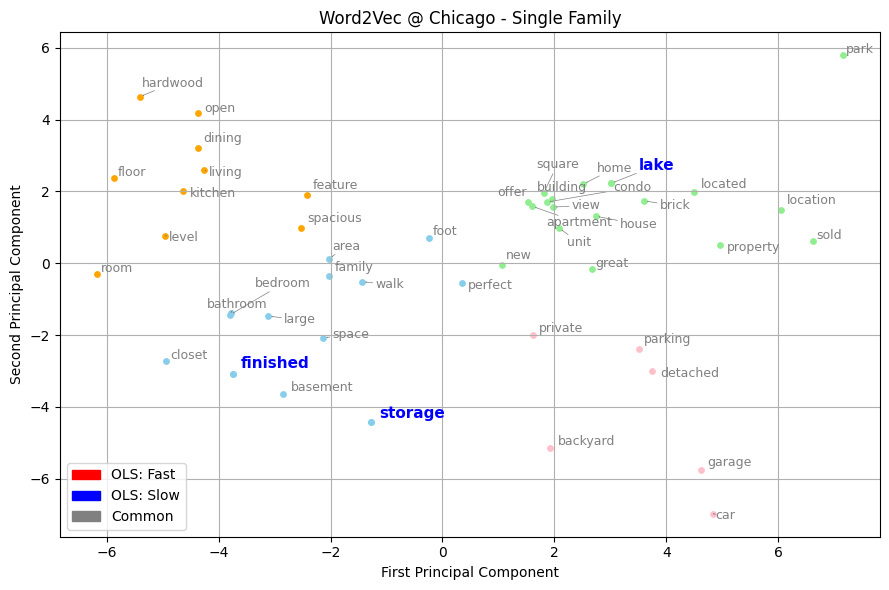

In [178]:
visualize_pca_for_group('CH', 0, w2v_models, all_keywords, ch_slow_sf, ch_fast_sf)

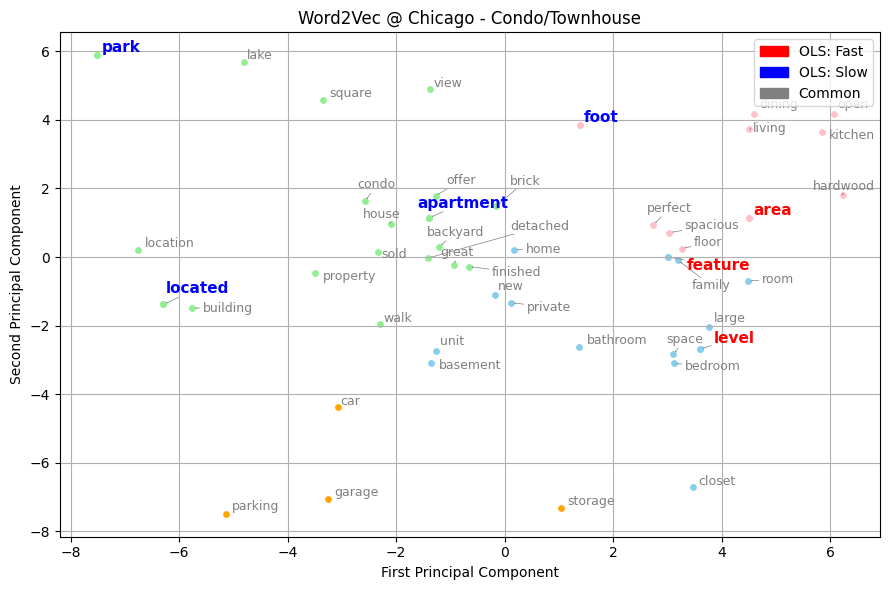

In [179]:
visualize_pca_for_group('CH', 1, w2v_models, all_keywords, ch_slow_ct, ch_fast_ct)

### New York

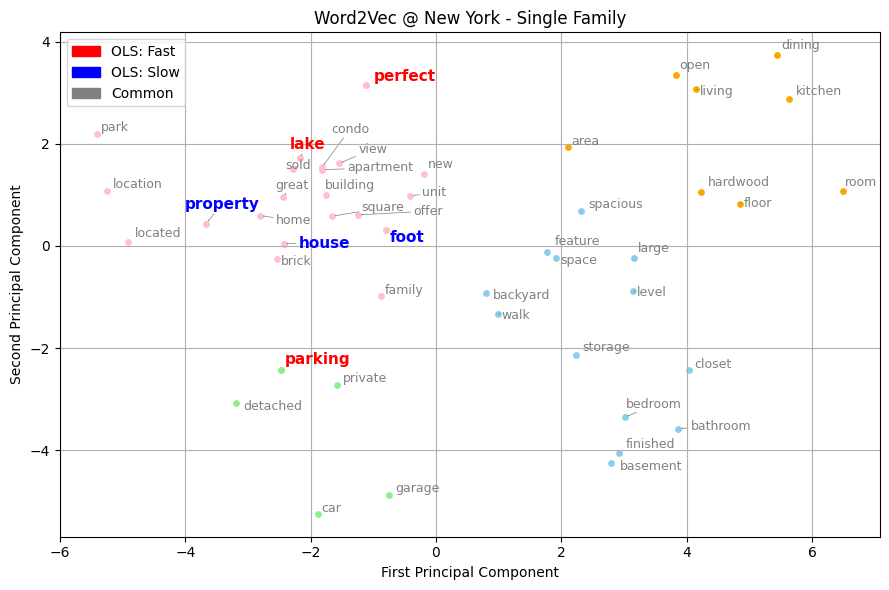

In [180]:
visualize_pca_for_group('NY', 0, w2v_models, all_keywords, ny_slow_sf, ny_fast_sf)

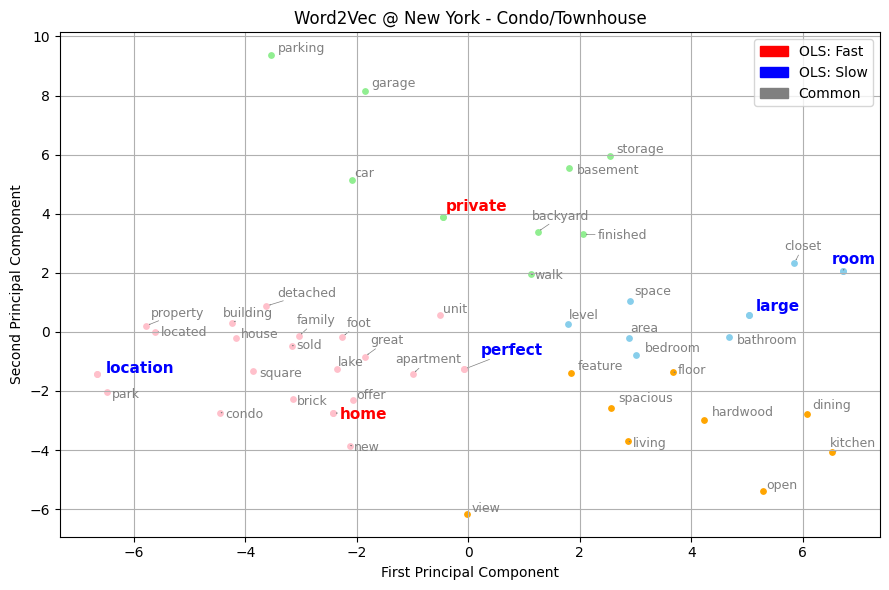

In [181]:
visualize_pca_for_group('NY', 1, w2v_models, all_keywords, ny_slow_ct, ny_fast_ct)

### Los Angeles

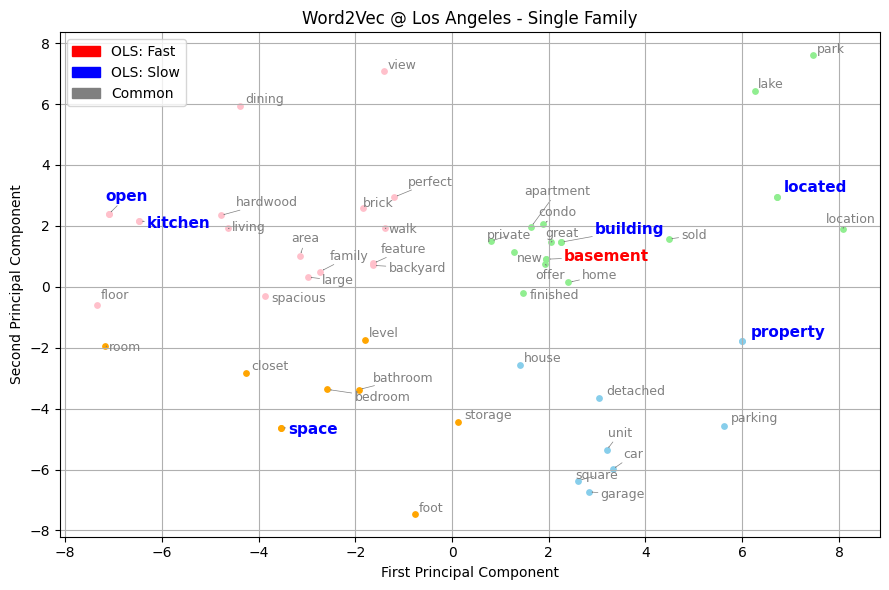

In [182]:
visualize_pca_for_group('LA', 0, w2v_models, all_keywords, la_slow_sf, la_fast_sf)

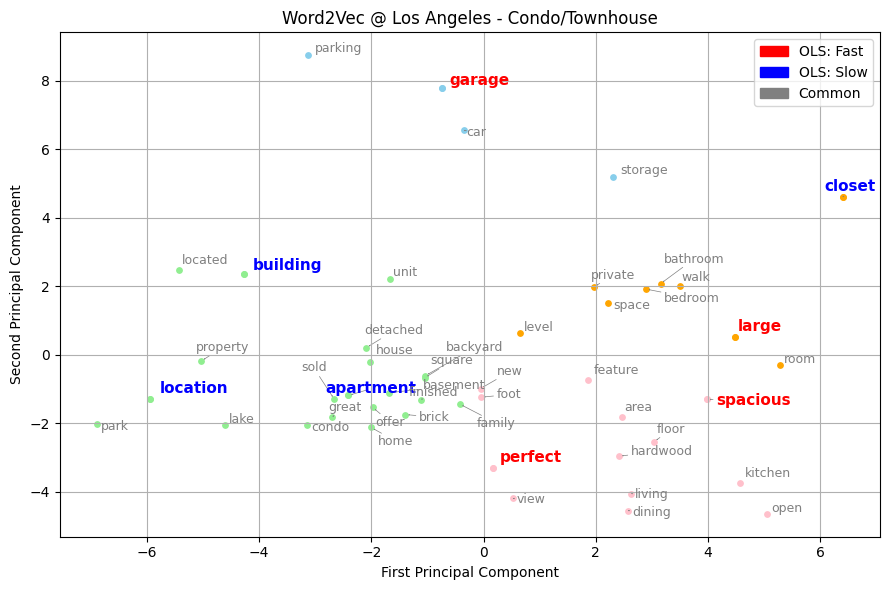

In [183]:
visualize_pca_for_group('LA', 1, w2v_models, all_keywords, la_slow_ct, la_fast_ct)

## Similarity

In [44]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.preprocessing import normalize

def similar_words(target_word, topn=10):
    def normalize_and_create_model(model):
        words = list(model.wv.key_to_index.keys())
        embeddings = np.array([model.wv[word] for word in words])
        normalized_embeddings = normalize(embeddings, axis=1, norm='l2')

        normalized_kv = KeyedVectors(model.wv.vector_size)
        normalized_kv.add_vectors(words, normalized_embeddings)

        return normalized_kv

    normalized_models = {group: normalize_and_create_model(model) for group, model in w2v_models.items()}

    def find_similar_words(word, model, topn):
        if word in model:
            similar = model.most_similar(word, topn=topn+1)
            return [item[0] for item in similar if item[0] != word][:topn]
        else:
            return []

    def get_similar_words_across_groups(target_word, normalized_models, topn):
        similar_words = {}
        for group, model in normalized_models.items():
            similar_words[group] = find_similar_words(target_word, model, topn)
        return similar_words

    similar_words = get_similar_words_across_groups(target_word, normalized_models, topn)

    print(f"Similar words to '{target_word}' in each group:")

    cities = ['CH', 'NY', 'LA']
    city_names = {'CH': 'Chicago', 'NY': 'New York', 'LA': 'Los Angeles'}
    property_types = ['Single Family', 'Condo/Townhouse']

    for city in cities:
        print(f"\n{city_names[city]}:")
        print(f"{'Single Family':<20} {'Condo/Townhouse':<20}")
        print("-" * 40)

        sf_words = similar_words[(city, 0)]
        ct_words = similar_words[(city, 1)]

        for i in range(topn):
            sf_word = sf_words[i] if i < len(sf_words) else ""
            ct_word = ct_words[i] if i < len(ct_words) else ""
            print(f"{i+1}. {sf_word:<18} {i+1}. {ct_word:<18}")

    print("\n")
    print("###################################################")
    print("\n")

In [45]:
for word in all_keywords:
    similar_words(word, topn=5)

Similar words to 'apartment' in each group:

Chicago:
Single Family        Condo/Townhouse     
----------------------------------------
1. loft               1. cooperative       
2. separated          2. marshall          
3. addition           3. benjamin          
4. nicely             4. bronzeville       
5. carpeted           5. impeccably        

New York:
Single Family        Condo/Townhouse     
----------------------------------------
1. person             1. unit              
2. planting           2. duplex            
3. professional       3. particular        
4. like               4. corner            
5. housing            5. duplexed          

Los Angeles:
Single Family        Condo/Townhouse     
----------------------------------------
1. supplemental       1. plex              
2. cave               2. spanish           
3. 370                3. distinctive       
4. airbnb             4. comprises         
5. workout            5. luxuriously       


##########

## Visualize (보류)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import normalize

def plot_combined_word_embeddings(highlight_words, w2v_models):

    background_color = mcolors.to_rgba('gray', alpha=0.5)
    colors = [
        mcolors.to_rgba('darkred', alpha=0.8),
        mcolors.to_rgba('darkred', alpha=0.8),
        mcolors.to_rgba('darkgreen', alpha=0.8),
        mcolors.to_rgba('darkgreen', alpha=0.8),
        mcolors.to_rgba('navy', alpha=0.8),
        mcolors.to_rgba('navy', alpha=0.8)
    ]
    markers = ['o', 's'] * 3
    combination_labels = {
        ('CH', 0): 'Chicago - Single Family',
        ('CH', 1): 'Chicago - Condo/Townhouse',
        ('NY', 0): 'New York - Single Family',
        ('NY', 1): 'New York - Condo/Townhouse',
        ('LA', 0): 'Los Angeles - Single Family',
        ('LA', 1): 'Los Angeles - Condo/Townhouse'
    }

    # embedding

    all_embeddings = []
    all_labels = []
    highlight_points = {word: [] for word in highlight_words}

    for combination, model in w2v_models.items():
        words = list(model.wv.key_to_index.keys())
        embeddings = np.array([model.wv[word] for word in words])
        # embeddings = normalize(embeddings, axis=1, norm='l2')  # normalize (검토 필요)

        for word in highlight_words:
            if word in words:
                idx = words.index(word)
                highlight_points[word].append((combination, embeddings[idx]))

        all_embeddings.append(embeddings)
        all_labels.extend([combination_labels[combination]] * len(words))

    all_embeddings = np.vstack(all_embeddings)

    pca = PCA(n_components=2)
    all_embeddings_2d = pca.fit_transform(all_embeddings)

    # plot

    plt.figure(figsize=(8, 6))
    plt.scatter(all_embeddings_2d[:, 0], all_embeddings_2d[:, 1], color=background_color, alpha=0.1, label='Other Words')

    for word, points in highlight_points.items():
        for idx, (combination, point) in enumerate(points):
            point_2d = pca.transform([point])[0]
            marker = markers[idx]
            facecolor = colors[idx]
            if marker == 's':
                plt.scatter(point_2d[0], point_2d[1], edgecolors=colors[idx], facecolors='none', s=100, linewidth=1.5, marker=marker)
            else:
                plt.scatter(point_2d[0], point_2d[1], color=colors[idx],
                            s=100, edgecolors=colors[idx], facecolors=facecolor, linewidth=1.5, marker=marker)

    plt.title(f"{word} @ Word2Vec")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    legend_labels = ['Other Words'] + [combination_labels[key] for key in combination_labels.keys()]
    plt.legend(legend_labels, fontsize=8.5)
    plt.tight_layout()
    plt.show()

### Base Setting

In [ ]:
for word in all_keywords:
    plot_combined_word_embeddings([word], w2v_models)

Output hidden; open in https://colab.research.google.com to view.

### High Threshold

In [ ]:
w2v_models = train_w2v(min_count=20)

100%|██████████| 6/6 [00:15<00:00,  2.58s/it]


Vocab Size:
('CH', 0): 1049 Words
('CH', 1): 1390 Words
('NY', 0): 767 Words
('NY', 1): 1607 Words
('LA', 0): 1884 Words
('LA', 1): 1141 Words


In [ ]:
for word in all_keywords:
    plot_combined_word_embeddings([word], w2v_models)

Output hidden; open in https://colab.research.google.com to view.

## Save

In [ ]:
# Add various choices (emb_dim, window, min_count), for ML prediction

w2v_models = train_w2v()

100%|██████████| 6/6 [00:12<00:00,  2.10s/it]


Vocab Size:
('CH', 0): 3726 Words
('CH', 1): 4516 Words
('NY', 0): 2971 Words
('NY', 1): 5892 Words
('LA', 0): 6291 Words
('LA', 1): 4235 Words


In [ ]:
def generate_embeddings(zillow_df, w2v_models, emb_dim=256, pca_dim=32):
    embeddings_dict = {}
    pca_embeddings_dict = {}
    combinations = list(product(zillow_df['city'].unique(), [0, 1])) # city, single_family

    for combination in tqdm(combinations):
        subset = zillow_df[(zillow_df['city'] == combination[0]) & (zillow_df['single'] == combination[1])]
        model = w2v_models[combination]

        all_word_vectors = []
        for index, row in subset.iterrows():
            words = row['description'].split()
            word_vectors = [model.wv[word] for word in words if word in model.wv]
            if word_vectors:
                embedding = np.mean(word_vectors, axis=0) # mean of embeddings
                all_word_vectors.append(embedding)
            else:
                embedding = np.zeros(emb_dim)
                all_word_vectors.append(embedding)

            embeddings_dict[row['zpid']] = embedding

        # Fit PCA on the entire set of embeddings for this group
        if all_word_vectors:
            pca = PCA(n_components=pca_dim)
            pca_embeddings = pca.fit_transform(all_word_vectors)
            for idx, row in enumerate(subset.iterrows()):
                zpid = row[1]['zpid']
                pca_embeddings_dict[zpid] = pca_embeddings[idx]

    return embeddings_dict, pca_embeddings_dict

In [ ]:
embeddings_dict, pca_embeddings_dict = generate_embeddings(zillow_df, w2v_models)

100%|██████████| 6/6 [00:08<00:00,  1.50s/it]


In [ ]:
embeddings_df = pd.DataFrame.from_dict(embeddings_dict, orient='index')
embeddings_df.columns = [f'embed_{i}' for i in range(256)]
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'zpid'}, inplace=True)
embeddings_df.to_csv(os.path.join(main_dir, 'dataset', '4. w2v_embedding.csv'), index=False)

embeddings_df

,zpid,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_246,embed_247,embed_248,embed_249,embed_250,embed_251,embed_252,embed_253,embed_254,embed_255
0,4171164,-0.119965,-0.222866,0.238215,0.227422,0.299872,-0.310000,0.079286,0.162422,-0.168841,...,0.223464,-0.007206,-0.162735,-0.102017,-0.255791,-0.041559,-0.251558,0.012404,-0.272424,0.197628
1,4016685,0.107513,0.089556,-0.054929,0.245915,0.202178,-0.003926,0.129835,-0.038144,-0.031730,...,0.183473,-0.027997,0.089133,-0.094464,-0.156036,0.259032,-0.106731,-0.028881,-0.244925,-0.213802
2,3638932,-0.132287,-0.163984,0.169585,0.160513,0.279243,-0.319460,0.023794,0.147668,-0.183311,...,0.213268,-0.020160,-0.143695,-0.115935,-0.208955,-0.126121,-0.210337,0.065599,-0.239116,0.223258
3,4116360,0.133551,0.002450,0.079935,0.271533,0.171840,-0.245313,0.043394,0.073318,-0.166699,...,0.089511,-0.163466,0.002611,-0.133744,-0.334398,0.209188,-0.059271,0.102027,-0.206558,0.008846
4,3946804,0.103091,-0.017608,0.130696,0.241815,0.227894,-0.203382,0.049159,0.119548,-0.098982,...,0.203364,-0.096827,-0.013891,-0.004618,-0.180039,0.130514,-0.172449,0.036378,-0.158418,-0.040934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,81960930,-0.011282,-0.251361,-0.018059,0.184571,0.369815,-0.045418,0.134331,-0.014061,0.007771,...,0.200795,0.050865,-0.163125,-0.127286,-0.240469,0.234119,-0.100269,-0.193148,-0.366322,0.032201
10107,2064365471,0.030621,-0.077928,-0.029084,-0.045738,0.210093,-0.145228,0.176237,-0.026951,0.087579,...,0.105180,0.028378,-0.257993,-0.114535,-0.109852,0.148933,-0.066035,-0.039758,-0.444862,0.018349
10108,20128161,0.023016,-0.081474,-0.032800,-0.057023,0.232024,-0.206321,0.218836,0.022908,0.095507,...,0.209673,0.011718,-0.365636,-0.239330,-0.221101,0.227712,-0.159161,-0.245522,-0.487834,-0.033940
10109,20741270,0.034928,0.008389,0.063293,-0.102794,0.330815,-0.116348,0.256895,0.100698,0.089518,...,0.250046,-0.016433,-0.551939,-0.370161,-0.266582,0.282428,-0.137197,-0.253085,-0.381095,0.113579


In [ ]:
embeddings_df = pd.DataFrame.from_dict(pca_embeddings_dict, orient='index')
embeddings_df.columns = [f'pca_{i}' for i in range(32)]
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'zpid'}, inplace=True)
embeddings_df.to_csv(os.path.join(main_dir, 'dataset', '4. w2v_pca.csv'), index=False)
embeddings_df

,zpid,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,...,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31
0,4171164,0.456618,0.089790,-0.385005,0.178988,-0.151572,0.337097,-0.001545,-0.121557,0.096033,...,-0.012387,-0.000549,0.004977,0.001819,0.002223,-0.004770,0.007689,0.000074,-0.006769,-0.000810
1,4016685,-2.157593,0.398139,-0.263122,-0.365393,0.165727,-0.195624,-0.081021,-0.124797,-0.007626,...,0.007043,0.006386,-0.021022,-0.010440,-0.007260,0.007682,-0.008644,-0.005621,0.008528,-0.000807
2,3638932,0.464936,-0.042802,-0.724354,0.073440,-0.149926,-0.024077,0.055595,0.012811,-0.027123,...,0.017369,0.010176,-0.006706,-0.002855,-0.002011,0.000952,-0.005180,-0.006513,0.001675,0.005536
3,4116360,-1.024488,-0.463791,0.088494,-0.347469,-0.367052,-0.288981,0.191410,-0.006976,-0.061057,...,0.001276,-0.004725,0.017497,0.021998,0.022062,-0.002967,-0.013703,0.017604,-0.001542,-0.004684
4,3946804,-1.044605,-0.438214,-0.558286,0.127743,0.057232,0.251081,0.169605,0.162259,-0.051044,...,-0.009105,0.006408,0.003389,-0.000759,-0.003152,0.000812,-0.000406,0.002651,0.004350,0.000274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,81960930,-0.939856,0.673463,0.438617,0.002301,0.531759,-0.043811,0.288499,-0.179280,-0.112857,...,-0.000734,0.007926,-0.000524,0.001280,0.000493,-0.005776,-0.001884,-0.002816,-0.003000,-0.006283
10107,2064365471,0.177199,0.028819,-0.117753,0.366667,-0.013869,-0.028387,-0.176749,-0.084741,0.018424,...,0.011791,0.004826,0.014325,0.007440,0.006566,-0.003639,0.003886,0.000974,0.002218,-0.004129
10108,20128161,0.641080,-0.574578,0.311878,-0.068686,-0.384140,0.238865,-0.131502,0.087935,0.092088,...,-0.013275,-0.016337,-0.005917,0.013279,-0.000319,0.002791,0.016506,0.007159,-0.002565,-0.012021
10109,20741270,-0.490625,-1.696787,0.257689,0.055451,0.262326,0.017775,-0.108660,0.118803,0.129336,...,0.004790,0.023896,-0.005906,-0.011263,0.005697,-0.010918,0.003353,-0.020796,0.011818,0.003399


# BERT

In [ ]:
import geopandas as gpd

zillow_df = gpd.read_file(os.path.join(main_dir, 'dataset', '2. zillow_cleaned.geojson')) # not tokenized
zillow_df

,zpid,city,submarket,zipcode,address,price,like,view,duration,day,single,parking,bathroom,bedroom,age,living,description,geometry
0,4171164,CH,South,60617,10905 S Avenue H,309000,0,20,134,64,0,2.5,4.0,4.0,81.0,2376.0,Tastefully and professionally updated 4BR / 3....,POINT (-87.53252 41.69706)
1,80851025,CH,South,60616,475 W 24th St APT 5H,265000,0,44,50,7,1,1.0,2.0,2.0,19.0,900.0,Experience City living as its finest in this t...,POINT (-87.63969 41.84879)
2,2127908883,CH,West,60612,2827 W Congress Pkwy APT 3,230000,0,7,90,83,1,1.0,2.0,2.0,17.0,1300.0,"Offering exceptional comfort, convenience, and...",POINT (-87.69721 41.87457)
3,60265291,CH,North,60614,2712 N Ashland Ave #4A,460271,0,20,25,64,1,1.0,2.0,2.0,24.0,1700.0,Looking for an updated extra-wide 2 bed/2 bath...,POINT (-87.66872 41.93097)
4,3700052,CH,North,60640,5415 N Sheridan Rd APT 306,319000,2,112,37,40,1,1.0,2.0,2.0,51.0,1250.0,"Discover the allure of this 2-bed, 2-bath gem ...",POINT (-87.65439 41.97993)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,20383564,LA,West LA,90045,8117 Chase Ave,1811700,4,186,41,7,0,4.0,3.0,4.0,78.0,1892.0,Welcome to this impressive Westchester home vi...,POINT (-118.41126 33.96461)
10107,20510134,LA,West LA,90067,10128 Empyrean Way APT 302,2100000,0,17,178,79,1,2.0,4.0,2.0,45.0,2498.0,"From the foyer, enter to a sophisticated livin...",POINT (-118.40809 34.05322)
10108,19905411,LA,San Fernando Valley,91335,7428 Vanalden Ave,815000,0,59,5,47,0,2.0,1.0,3.0,72.0,1670.0,Major Equity opportunity in the City of Reseda...,POINT (-118.54884 34.20552)
10109,302794497,LA,West LA,90094,12678 Millennium,3715000,1,140,78,12,0,3.0,5.0,4.0,7.0,3639.0,Embrace luxury living and the best in Playa Vi...,POINT (-118.41388 33.97678)


In [ ]:
import torch
from transformers import BertTokenizer, BertModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def chunk_text(text, chunk_size=512):
    tokens = tokenizer.tokenize(text)
    return [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size)]

def get_bert_embedding(text):
    chunks = chunk_text(text)
    chunk_embeddings = []

    for chunk in chunks:
        inputs = tokenizer.encode_plus(chunk, return_tensors='pt', truncation=True, padding='max_length', max_length=512).to(device)
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)
        chunk_embeddings.append(embeddings.cpu().detach().numpy())

    full_embedding = np.mean(chunk_embeddings, axis=0) # mean
    return full_embedding

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from itertools import product
from sklearn.decomposition import PCA

embeddings_dict = {}
pca_embeddings_dict = {}
combinations = list(product(zillow_df['city'].unique(), [0, 1])) # city, single_family
zillow_subsets = {combination: zillow_df[(zillow_df['city'] == combination[0]) & (zillow_df['single'] == combination[1])] for combination in combinations}

pca_dim = 32

for combination in combinations:
    subset = zillow_df[(zillow_df['city'] == combination[0]) & (zillow_df['single'] == combination[1])]

    # BERT Embedding
    embeddings = []
    for index, row in tqdm(subset.iterrows(), desc=f"BERT Embedding for {combination}"):
        embedding = get_bert_embedding(row['description'])
        embeddings.append(embedding)

    embeddings = np.squeeze(np.array(embeddings), axis=1)

    # PCA 적용
    if len(embeddings) > 0:
        pca = PCA(n_components=pca_dim)
        pca_transformed = pca.fit_transform(embeddings)

        # Store embeddings and PCA transformed embeddings
        for i, index in enumerate(subset.index):
            zpid = subset.loc[index, 'zpid']
            embeddings_dict[zpid] = embeddings[i]  # original embedding
            pca_embeddings_dict[zpid] = pca_transformed[i]  # PCA transformed embedding

BERT Embedding for ('CH', 0): 1510it [00:58, 25.92it/s]
BERT Embedding for ('CH', 1): 1805it [01:05, 27.74it/s]
BERT Embedding for ('NY', 0): 1017it [00:35, 28.47it/s]
BERT Embedding for ('NY', 1): 2003it [01:15, 26.49it/s]
BERT Embedding for ('LA', 0): 2537it [01:34, 26.95it/s]
BERT Embedding for ('LA', 1): 1239it [00:45, 27.25it/s]


In [ ]:
embeddings_df = pd.DataFrame.from_dict(embeddings_dict, orient='index')
embeddings_df.columns = [f'emb_{i}' for i in range(embeddings_df.shape[1])]
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'zpid'}, inplace=True)
embeddings_df.to_csv(os.path.join(main_dir, 'dataset', '4. bert_embedding.csv'), index=False)
embeddings_df

,zpid,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_758,emb_759,emb_760,emb_761,emb_762,emb_763,emb_764,emb_765,emb_766,emb_767
0,4171164,-0.079892,-0.067128,0.598743,0.199881,0.655910,-0.208648,-0.052987,0.052624,0.019660,...,0.002209,-0.066249,0.021836,0.003349,-0.158957,-0.161074,-0.080721,-0.021704,0.088047,-0.194490
1,4016685,0.172109,-0.160533,0.539543,-0.051906,0.354876,-0.164094,0.240956,0.194677,0.072477,...,0.110557,-0.127086,0.028052,-0.063860,-0.154856,-0.082603,-0.231665,0.029396,-0.021418,-0.165803
2,3638932,-0.051095,0.126154,0.314217,0.096462,0.620950,-0.177787,-0.068182,0.099735,-0.053974,...,-0.195316,-0.083266,-0.072137,0.110479,-0.169599,-0.422717,0.066835,0.048301,0.037172,-0.148788
3,4116360,-0.086122,-0.198412,0.483191,-0.106308,0.408407,-0.091451,0.006080,0.145000,0.124491,...,0.294773,-0.068021,0.086495,-0.140743,-0.201618,-0.158005,-0.034060,0.108299,-0.008776,-0.069019
4,3946804,-0.174413,0.041813,0.460285,0.122448,0.723423,-0.175869,-0.034451,0.238504,0.054642,...,-0.095778,-0.153731,0.040213,0.025163,-0.375998,-0.533569,-0.005384,-0.109406,-0.059209,-0.185234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,81960930,0.093089,-0.064217,0.502761,0.112804,0.556444,-0.130752,-0.110570,0.174307,0.065802,...,-0.027686,-0.013800,-0.118854,-0.131067,-0.060719,-0.309996,-0.057503,-0.024653,0.046596,-0.174695
10107,2064365471,-0.100256,0.034991,0.373757,0.008940,0.690762,-0.186085,-0.120229,0.164895,0.124979,...,-0.105782,-0.018865,-0.128647,0.000004,-0.210327,-0.437425,0.077411,0.040935,-0.005144,-0.116304
10108,20128161,0.007246,-0.327211,0.312907,0.155226,0.479386,-0.178076,-0.020676,0.099816,-0.132019,...,0.026608,-0.103237,-0.003649,0.186655,-0.132525,-0.118300,0.081637,-0.125074,0.017227,-0.190272
10109,20741270,-0.077429,-0.107386,0.650824,0.040131,0.337166,-0.017046,0.003979,-0.119258,0.137243,...,0.264980,0.025686,-0.072621,-0.119667,-0.147919,-0.057977,-0.157109,0.060936,0.085893,-0.191518


In [ ]:
embeddings_df = pd.DataFrame.from_dict(pca_embeddings_dict, orient='index')
embeddings_df.columns = [f'pca_{i}' for i in range(pca_dim)]
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'zpid'}, inplace=True)
embeddings_df.to_csv(os.path.join(main_dir, 'dataset', '4. bert_pca.csv'), index=False)
embeddings_df

,zpid,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,...,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31
0,4171164,0.981318,-0.850395,0.665262,-0.452982,0.241107,0.363472,-0.261069,0.066069,-0.035061,...,0.074151,0.302540,-0.297929,-0.219099,-0.074798,-0.013947,0.019658,0.241600,0.000217,0.173076
1,4016685,-1.725165,1.808675,0.554701,-0.905425,0.166010,-0.069276,0.655223,-0.052532,-0.559476,...,-0.057093,-0.251500,0.072636,-0.003742,0.299997,-0.155731,0.103498,-0.163015,0.224072,0.433368
2,3638932,1.744010,0.483937,-0.559241,0.685366,-0.019192,0.365708,-0.430387,-0.270507,0.141480,...,-0.180451,-0.125636,-0.327241,0.090504,-0.092460,0.099371,0.127525,-0.074272,0.203362,0.071731
3,4116360,-1.635175,0.861640,2.186311,1.400648,0.120533,0.226364,0.524415,-0.543619,0.308942,...,-0.057523,0.155976,0.293204,0.036025,0.807017,-0.016831,0.208986,0.036916,-0.378630,0.345290
4,3946804,2.281959,1.239833,0.462021,0.663690,0.565300,-0.440409,-0.491561,-0.045444,0.058113,...,-0.100179,-0.047546,0.354586,-0.002388,-0.140394,-0.037001,-0.225810,-0.072347,-0.053413,0.135207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,81960930,0.095783,0.472013,0.027914,0.091390,0.605667,0.305500,-0.163820,-0.187450,0.164108,...,0.064450,0.104562,0.056135,-0.120385,0.099294,-0.139290,-0.106095,0.104975,0.054608,0.153494
10107,2064365471,1.387207,0.148413,-0.363967,-0.567874,-0.989011,0.426834,-0.175179,-0.089529,0.101807,...,0.135215,-0.104556,0.216894,0.009427,-0.027511,-0.073168,-0.099752,-0.043228,0.018568,0.088251
10108,20128161,-2.603536,-1.219140,-0.549549,0.299240,-1.215089,0.038338,0.318092,-0.160617,0.561030,...,0.171197,0.158545,-0.222298,0.016716,0.304093,-0.283057,-0.109465,0.043723,-0.067356,-0.140763
10109,20741270,-2.991828,-0.008078,1.895042,-0.954740,-0.502153,0.774104,-0.181540,0.211589,-0.173291,...,-0.155534,0.219311,0.126326,-0.139010,0.241280,0.171368,0.273849,-0.359464,-0.026518,-0.003473
